**Build a GPU deep learning environment and use the deep learning library tensorflow to perform image recognition.**

In [ ]:
# run to make sure GPU is available

from tensorflow.python.client import device_lib
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9707476418313971362
 xla_global_id: -1]

In [ ]:
# import libraries
from __future__ import absolute_import, division, print_function, unicode_literals

# import tensorflow
import tensorflow as tf

In [ ]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# check MNIST datatype
print(type(x_train))

<class 'numpy.ndarray'>


In [ ]:
# check how many records of the data structure are stored

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


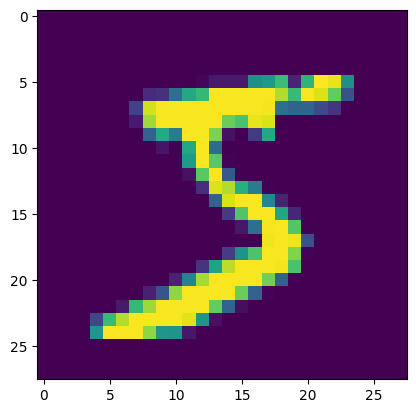

In [ ]:
# display a 28 x 28 pixel image of a training dataset.

import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [ ]:
# display the correct answer

print(y_train[0])

5


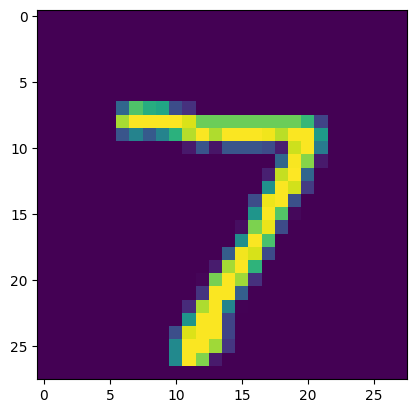

In [ ]:
plt.imshow(x_test[0])

In [ ]:
y_test[0]

7

*Train a deep learning model using the 60,000 training dataset and the pair of
correct answer labels x_train and y_train that were just used to see if we can predict the number 7 from the image 7 in this test dataset. 
The code below builds an all-coupled neural network with three intermediate layers.*

In [ ]:
# Building a Deep Learning Model
model = tf.keras.models.Sequential([
tf.keras.layers.InputLayer(input_shape=( 784 , )),
tf.keras.layers.Dense( 256 , activation= 'relu' ),
tf.keras.layers.Dropout( 0.2 ),
tf.keras.layers.Dense( 128 , activation= 'relu' ),
tf.keras.layers.Dropout( 0.2 ),
tf.keras.layers.Dense( 256 , activation= 'relu' ),
tf.keras.layers.Dropout( 0.2 ),
tf.keras.layers.Dense( 10 , activation= 'softmax' )
])
# Compilation and overview of the model
model.compile(
optimizer= 'adam' ,
loss= 'binary_crossentropy' ,
metrics=[ 'accuracy' ]
)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2

In [ ]:
# Preprocessing of MNIST data (flatten 28 x 28 pixel to 784 for input)
x_train = x_train.reshape( 60000 , 784 )
x_test = x_test.reshape( 10000 , 784 )
# Casting to a float32 type because of a true divide error when dividing by itself
x_train = x_train.astype( 'float32' )
x_test = x_test.astype( 'float32' )
# Normalizes data to a float32 type in the range of 0 to 1
x_train /= 255
x_test /= 255
# Convert to categorical data (1 => [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
y_train = tf.keras.utils.to_categorical(y_train, 10 )
y_test = tf.keras.utils.to_categorical(y_test, 10 )

In [ ]:
model.fit(x_train, y_train, epochs= 20)

Epoch 1/20
1875/1875 [==============================] - 19s 9ms/step - loss: 0.0523 - accuracy: 0.9108
Epoch 2/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0233 - accuracy: 0.9617
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0182 - accuracy: 0.9707
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0153 - accuracy: 0.9750
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0137 - accuracy: 0.9780
Epoch 6/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0119 - accuracy: 0.9805
Epoch 7/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0111 - accuracy: 0.9819
Epoch 8/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0101 - accuracy: 0.9837
Epoch 9/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0090 - accuracy: 0.9852
Epoch 10/20
1875/1875 [==============================] - 15s 8ms/step - 

In [ ]:
model.evaluate(x_test, y_test, verbose= 2 )

313/313 - 1s - loss: 0.0141 - accuracy: 0.9836 - 809ms/epoch - 3ms/step


[0.014070039615035057, 0.9836000204086304]

In [ ]:
model.fit(x_train, y_train, epochs= 20 , validation_split= 0.3 )

Epoch 1/20
1313/1313 [==============================] - 13s 9ms/step - loss: 0.0047 - accuracy: 0.9923 - val_loss: 0.0017 - val_accuracy: 0.9970
Epoch 2/20
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0049 - accuracy: 0.9928 - val_loss: 0.0032 - val_accuracy: 0.9950
Epoch 3/20
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0049 - accuracy: 0.9928 - val_loss: 0.0036 - val_accuracy: 0.9946
Epoch 4/20
1313/1313 [==============================] - 11s 9ms/step - loss: 0.0050 - accuracy: 0.9926 - val_loss: 0.0030 - val_accuracy: 0.9952
Epoch 5/20
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0046 - accuracy: 0.9935 - val_loss: 0.0030 - val_accuracy: 0.9953
Epoch 6/20
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0045 - accuracy: 0.9940 - val_loss: 0.0035 - val_accuracy: 0.9943
Epoch 7/20
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0040 - accuracy: 0.9937 - val_loss: 0.0041 - val_ac

In [ ]:
model.evaluate(x_test, y_test, verbose= 2 )

313/313 - 1s - loss: 0.0177 - accuracy: 0.9816 - 685ms/epoch - 2ms/step


[0.017651233822107315, 0.9815999865531921]

The percentage of correct answers is not that different than when we had it trained and predicted with the training dataset.

Made the following hypotheses about the cause of this:

1.   Lack of a training dataset.
  - In a training dataset of 42,000 training data, is it not possible to capture the characteristics of the 10,000 training dataset for testing (i.e., there is a lack of variation in the training data)?
2.   Lack of epochs.
  - Validation_split has reduced the number of data to train the model from 60,000 to 42,000, so the training may still be completed before the peak of the correctness rate?


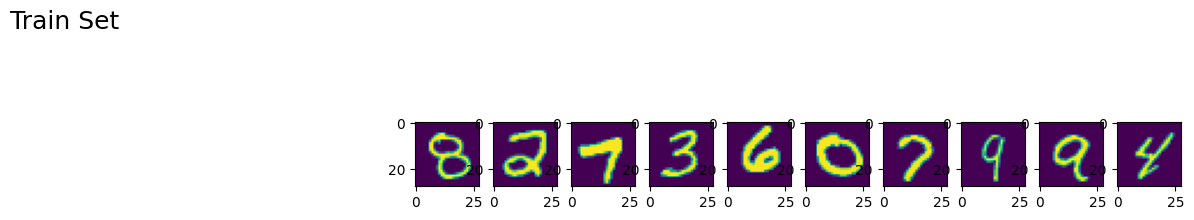

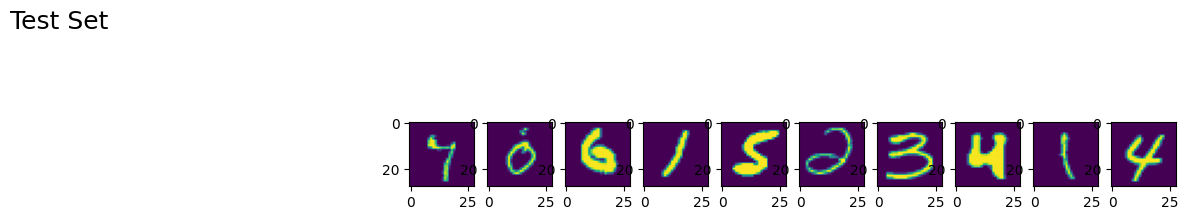

In [ ]:
# Displaying 10 randomly from each of the training and test data to verify that (1) is true.

import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(xo_train, yo_train), (xo_test, yo_test) = tf.keras.datasets.mnist.load_data()

# Define the plot_random10 function
def plot_random10(mnist_data, title):
    """Get 10 randomly from mnist data and draw"""
    fig = plt.figure(figsize=(28, 28), dpi=100)
    fig.suptitle(title, fontsize=18, x=0, y=0.92)
    for index, x in enumerate(mnist_data[np.random.choice(np.arange(0, len(mnist_data)), 10, replace=False)], 1):
        ax = fig.add_subplot(28, 28, index)
        plt.imshow(x)

# Call the plot_random10 function to plot 10 random images from the training set
plot_random10(xo_train, 'Train Set')

# Call the plot_random10 function to plot 10 random images from the test set
plot_random10(xo_test, 'Test Set')

In [ ]:
# to test the hypothesis of (2), use the results of training epochs 50 times to make a prediction.

model.fit(x_train, y_train, epochs=50, validation_split=0.3)

Epoch 1/50
1313/1313 [==============================] - 11s 9ms/step - loss: 0.0035 - accuracy: 0.9960 - val_loss: 0.0067 - val_accuracy: 0.9908
Epoch 2/50
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0032 - accuracy: 0.9953 - val_loss: 0.0065 - val_accuracy: 0.9915
Epoch 3/50
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0033 - accuracy: 0.9955 - val_loss: 0.0069 - val_accuracy: 0.9917
Epoch 4/50
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0034 - accuracy: 0.9956 - val_loss: 0.0069 - val_accuracy: 0.9908
Epoch 5/50
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0035 - accuracy: 0.9952 - val_loss: 0.0076 - val_accuracy: 0.9901
Epoch 6/50
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0036 - accuracy: 0.9951 - val_loss: 0.0070 - val_accuracy: 0.9919
Epoch 7/50
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0029 - accuracy: 0.9960 - val_loss: 0.0082 - val_ac

In [ ]:
# prediction using trained model
# use the test data to perform image recognition.

prediction = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# check the predictions in the following code, the result is an array of 10 elements,
# with real numbers ranging from 0 to 1. 
# The index of the array with the largest number is the predicted number.

print(prediction[0])
print(f"\n{prediction}")

[0.0000000e+00 0.0000000e+00 8.2248522e-34 2.5988428e-38 0.0000000e+00
 0.0000000e+00 0.0000000e+00 9.9999994e-01 0.0000000e+00 1.8151705e-31]

[[0.0000000e+00 0.0000000e+00 8.2248522e-34 ... 9.9999994e-01
  0.0000000e+00 1.8151705e-31]
 [0.0000000e+00 0.0000000e+00 9.9999994e-01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 9.9999994e-01 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.9677589e-37
  0.0000000e+00 2.9572639e-34]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


In [ ]:
# return the subscript of the largest array of values.

print(np.argmax(prediction[0]))

7


In [ ]:
# output the correct answer label tell if this prediction is correct

print(np.argmax(y_test[0]))

7
